На основе данных imdb (датасет с Kaggle - https://www.kaggle.com/carolzhangdc/imdb-5000/downloads/imdb-5000.zip/1).

Примерные темы: По возрастным рейтингам рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию. Проверить есть ли зависимость некоторых параметров от возрастных рейтингов. Посмотреть изменения по возрастным рейтингам по годам.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/movie_metadata.csv', encoding='utf8')

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
plt.hist(df['content_rating'])
plt.show()

In [15]:
dfg = df.groupby('content_rating')['content_rating'].count() \
                                .reset_index(name='count') \
                                .sort_values(['count'], ascending=False) \
                                .head(5)
dfg

,content_rating,count
9,R,2118
7,PG-13,1461
6,PG,701
5,Not Rated,116
1,G,112


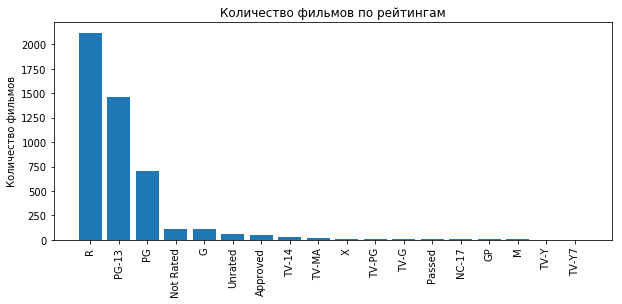

In [73]:
film_count = pd.value_counts(df['content_rating'].values, sort=True)
d = dict(film_count)
top = len(d)
plt.figure(figsize=(10,4))
plt.title('Количество фильмов по рейтингам')
plt.bar(np.arange(top), d.values())
plt.xticks(np.arange(top), d.keys(), rotation=90)
plt.ylabel('Количество фильмов')
plt.show()

In [76]:
dfy = df.loc[df['content_rating'].isin(['R','PG-13']) & df['title_year'].between(1990, 2015), ['content_rating','title_year']]
dfy.loc[:, 'q'] = 1
dfy['title_year'] = dfy['title_year'].astype(int)
dfg = dfy.groupby(['content_rating','title_year'], as_index=False)['q'].sum()
dfg.head(10)

,content_rating,title_year,q
0,PG-13,1990,10
1,PG-13,1991,7
2,PG-13,1992,7
3,PG-13,1993,12
4,PG-13,1994,17
5,PG-13,1995,15
6,PG-13,1996,28
7,PG-13,1997,30
8,PG-13,1998,33
9,PG-13,1999,43


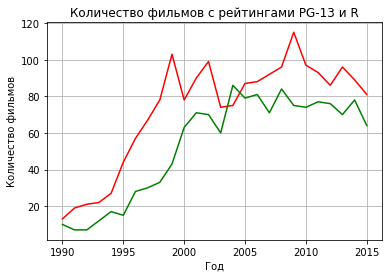

In [77]:
plt.plot(dfg.loc[dfg['content_rating'] == 'R', 'title_year'], dfg.loc[dfg['content_rating'] == 'R', 'q'], color='red')
plt.plot(dfg.loc[dfg['content_rating'] == 'PG-13', 'title_year'], dfg.loc[dfg['content_rating'] == 'PG-13', 'q'], color='green')
plt.title('Количество фильмов с рейтингами PG-13 и R', fontsize=12)
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

In [108]:
#Мода, медиана, квартили, дисперсия

df1 = df.loc[df['content_rating'].isin(['R']) & df['title_year'].between(1990, 2015), ['budget']]
print('Данные по бюджету фильмов с рейтингом R: ')
print(f"Медиана: {df1['budget'].median()}")
print(f"Мода: {df1['budget'].mode()[0]}")
print(f"Среднее: {df1['budget'].mean()}")
print(f"Дисперсия (несмещённая): {df1['budget'].var(ddof=1)}")
print(f"Первый квартиль: {df1['budget'].quantile([0.25]).values[0]}")
print(f"Второй квартиль: {df1['budget'].quantile([0.5]).values[0]}")
print(f"Третий квартиль: {df1['budget'].quantile([0.75]).values[0]}")

df2 = df.loc[df['content_rating'].isin(['PG-13']) & df['title_year'].between(1990, 2015), ['budget']]
print('\nДанные по бюджету фильмов с рейтингом PG-13: ')
print(f"Медиана: {df2['budget'].median()}")
print(f"Мода: {df2['budget'].mode()[0]}")
print(f"Среднее: {df2['budget'].mean()}")
print(f"Дисперсия (несмещённая): {df2['budget'].var(ddof=1)}")
print(f"Первый квартиль: {df2['budget'].quantile([0.25]).values[0]}")
print(f"Второй квартиль: {df2['budget'].quantile([0.5]).values[0]}")
print(f"Третий квартиль: {df2['budget'].quantile([0.75]).values[0]}")
      

Данные по бюджету фильмов с рейтингом R: 
Медиана: 15000000.0
Мода: 15000000.0
Среднее: 35832833.42141624
Дисперсия (несмещённая): 1.0032809998113326e+17
Первый квартиль: 5000000.0
Второй квартиль: 15000000.0
Третий квартиль: 35000000.0

Данные по бюджету фильмов с рейтингом PG-13: 
Медиана: 35000000.0
Мода: 40000000.0
Среднее: 54283673.03218391
Дисперсия (несмещённая): 1.0363329085950608e+16
Первый квартиль: 16000000.0
Второй квартиль: 35000000.0
Третий квартиль: 65000000.0


In [158]:
# Кореляция
df2 = df.loc[df['content_rating'].isin(['R','PG-13']) & df['title_year'].between(1990, 2015), \
             ['content_rating','director_name','budget','genres', 'imdb_score','actor_1_name']]
# Подготовим данные для вычисления кореляции (заменим строковые значения на числовые)
df2.loc[:,'content_rating_n'] = df2['content_rating'].rank(method='min', ascending=True)
df2.loc[:,'director_name_n'] = df2['director_name'].rank(method='min', ascending=True)
df2.loc[:,'genres_n'] = df2['genres'].rank(method='min', ascending=True)
df2.loc[:,'actor_1_name_n'] = df2['actor_1_name'].rank(method='min', ascending=True)

df2.corr()
# Получется, что эти значения мало связаны


,budget,imdb_score,content_rating_n,director_name_n,genres_n,actor_1_name_n
budget,1.000000,0.041133,-0.036740,-0.007799,-0.065270,-0.000321
imdb_score,0.041133,1.000000,0.115223,0.022056,0.038514,0.000073
content_rating_n,-0.036740,0.115223,1.000000,-0.002451,0.143792,0.016189
director_name_n,-0.007799,0.022056,-0.002451,1.000000,-0.015990,0.005512
genres_n,-0.065270,0.038514,0.143792,-0.015990,1.000000,-0.010837
actor_1_name_n,-0.000321,0.000073,0.016189,0.005512,-0.010837,1.000000


In [161]:
df3 = df2.loc[df2['actor_1_name'].isin(['Tom Cruise']), :]
df3.corr()
# Рейтинг и жанр для конкретного актёра показывает зависимость

,budget,imdb_score,content_rating_n,director_name_n,genres_n,actor_1_name_n
budget,1.000000,0.167402,-0.470012,-0.247299,-0.654749,NaN
imdb_score,0.167402,1.000000,0.320677,-0.221095,0.138741,NaN
content_rating_n,-0.470012,0.320677,1.000000,0.207138,0.756231,NaN
director_name_n,-0.247299,-0.221095,0.207138,1.000000,0.295359,NaN
genres_n,-0.654749,0.138741,0.756231,0.295359,1.000000,NaN
actor_1_name_n,NaN,NaN,NaN,NaN,NaN,NaN
